## **Постановка задачи**

Вы работаете специалистом по обработке данных в глобальной финансовой компании. На протяжении многих лет компания собирала основные банковские реквизиты и собирала много информации, связанной с кредитом. Руководство хочет создать интеллектуальную систему для разделения людей на группы кредитных баллов, чтобы уменьшить ручные усилия.

## **Задача**

Учитывая информацию, связанную с кредитом человека, создайте модель машинного обучения, которая может классифицировать кредитный рейтинг.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df

C:\Users\nedos\AppData\Local\Temp\ipykernel_30428\1862463380.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [5]:
print(df.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


* ID - Представляет уникальную идентификацию записи,

* Customer_ID - Представляет собой уникальную идентификацию клиента,

* Month - месяц взятия кредита,

* Name - имя клиента,

* Age - возраст клиента,

* SSN - номер социального страхования клиента,

* Occupation - профессия клиента,

* Annual_Income - Годовой доход клиента,

* Monthly_Inhand_Salary - ежемесячная базовая зарплата клиента,

* Num_Bank_Accounts - количество банковских счетов, которыми владеет клиент,

* Num_Credit_Card - номер кредитной карты клиента,

* Interest_Rate - процентная ставка по кредитной карте,

* Num_of_Loan - количество кредитов, взятых в банке,

* Type_of_Loan - типы кредитов, взятых клиентом,

* Delay_from_due_date - среднее количе

* Num_of_Delayed_Payment - среднее количество платежей, задержанных человеком,

* Changed_Credit_Limit - процентное изменение лимита кредитной карты,

* Num_Credit_Inquiries - количество запросов по кредитным картам,

* Credit_Mix - классификация набора кредитов,

* Outstanding_Debt - оставшийся долг, подлежащий выплате,

* Credit_Utilization_Ratio - коэффициент использования кредитной карты,

* Credit_History_Age - возраст кредитной истории лица,

* Payment_of_Min_Amount - была ли выплачена лицом только минимальная сумма,

* Total_EMI_per_month - ежемесячные платежи EMI (в долларах США),

* Amount_invested_monthly - ежемесячная сумма, инвестированная клиентом (в долларах США),

* Payment_Behaviour - платехное поведение клиента,

* Monthly_Balance - ежемесячный баланс клиента,

* Credit_Score - кредитный рейтинг.

In [6]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

## Проверим количество пропущенных значений для каждой колонны:

In [7]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Процент пропущенных полей:

In [8]:
df.isna().sum().sum() / (len(df) * len(df.columns)) * 100

2.1453928571428573

## Количество элементов в каждом классе:

In [9]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

# Исключим ненужные данные

In [10]:
df_reduced = df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1)

In [11]:
print(df_reduced.columns)
print('len: ', len(df_reduced.columns))

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
len:  24


In [12]:
df_reduced = df_reduced.applymap(
  lambda x: x if x is np.NaN or not \
    isinstance(x, str) else str(x).strip('_')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [13]:
df = df_reduced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      97909 non-null   object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [14]:
df['Age'] = df['Age'].astype(int)
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

# Избавляемся от выбросов

In [15]:
rows_to_drop =  df[
    # Из соображений логики, возраст клиента должен быть в диапазоне 0 < Age < 100
    ((df['Age'] <= 0) | (df['Age'] >= 100)) |
    # Также из соображений логики, количество банковских счетов не может быть отрицательным
    (df['Num_of_Loan']  < 0) | (df['Num_of_Loan']  > df['Num_of_Loan' ].quantile(0.995)) |
    (df['Num_of_Delayed_Payment']  < 0) | (df['Num_of_Delayed_Payment']  > df['Num_of_Delayed_Payment' ].quantile(0.995)) |
    (df['Num_Bank_Accounts']  < 0) | (df['Num_Bank_Accounts']  > df['Num_Bank_Accounts' ].quantile(0.995)) |
    (df['Num_Credit_Card']  < df['Num_Credit_Card'].quantile(0.005)) | (df['Num_Credit_Card']  > df['Num_Credit_Card'].quantile(0.995)) |
    (df['Interest_Rate']  < df['Interest_Rate'].quantile(0.005)) | (df['Interest_Rate']  > df['Interest_Rate'].quantile(0.995)) |
    (df['Total_EMI_per_month']  < df['Total_EMI_per_month'].quantile(0.005)) | (df['Total_EMI_per_month']  > df['Total_EMI_per_month'].quantile(0.995)) |
    (df['Annual_Income']  < df['Annual_Income'].quantile(0.005)) | (df['Annual_Income']  > df['Annual_Income'].quantile(0.995)) |
    (df['Monthly_Balance']  < df['Monthly_Balance'].quantile(0.005)) | (df['Monthly_Balance']  > df['Monthly_Balance'].quantile(0.995)) |
    (df['Num_Credit_Inquiries']  < df['Num_Credit_Inquiries'].quantile(0.005)) | (df['Num_Credit_Inquiries']  > df['Num_Credit_Inquiries'].quantile(0.995))].index
df_clear = df.drop(rows_to_drop)

df_clear.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,87887.000000,8.788700e+04,74725.000000,87887.000000,87887.000000,87887.000000,87887.000000,87887.000000,81681.000000,86062.000000,86168.000000,87887.000000,87887.000000,87887.000000,83978.000000,86799.000000
mean,33.291454,8.384062e+04,4147.281226,9.954510,15.891588,47.359257,3.541673,21.161935,16.043058,10.427116,16.756012,1429.441580,32.256829,1030.521043,632.387777,399.572241
std,10.777875,5.490343e+05,3111.906500,57.897614,89.281871,303.591315,2.442501,14.842033,55.441798,6.800461,114.510164,1156.340109,5.091133,6431.031843,2035.819678,202.531607
min,14.000000,7.230615e+03,319.556250,0.000000,1.000000,1.000000,0.000000,-5.000000,0.000000,-6.480000,0.000000,0.230000,20.000000,0.000000,0.000000,38.009577
25%,24.000000,1.942803e+04,1628.144167,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.360000,3.000000,566.980000,28.046211,30.519958,74.664738,270.670585
50%,33.000000,3.696676e+04,3074.806667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.440000,6.000000,1168.420000,32.272919,68.731992,135.215412,337.122196
75%,42.000000,7.160812e+04,5909.096667,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.950000,9.000000,1954.620000,36.476546,158.038909,262.858076,467.753519
max,99.000000,1.292080e+07,15204.633333,1096.000000,1177.000000,4311.000000,9.000000,67.000000,1732.000000,36.490000,1820.000000,4998.070000,47.480752,68937.000000,10000.000000,1235.389758


In [16]:
df_clear.isna().sum()

Month                           0
Age                             0
Occupation                   6191
Annual_Income                   0
Monthly_Inhand_Salary       13162
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 9877
Delay_from_due_date             0
Num_of_Delayed_Payment       6206
Changed_Credit_Limit         1825
Num_Credit_Inquiries         1719
Credit_Mix                  17776
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           7978
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3909
Payment_Behaviour            6673
Monthly_Balance              1088
Credit_Score                    0
dtype: int64

# Обработка пустых значений

In [17]:
categorical_columns = [c for c in df_clear.columns if df_clear[c].dtype.name == 'object']
numerical_columns   = [c for c in df_clear.columns if df_clear[c].dtype.name != 'object']
print('categorical_columns', categorical_columns)
print('numerical_columns', numerical_columns)

categorical_columns ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
numerical_columns ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [18]:
df_clear

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,June,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,NaN,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [19]:
df_clear['Num_Bank_Accounts'].dtype

dtype('int64')

In [20]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87887 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     87887 non-null  object 
 1   Age                       87887 non-null  int32  
 2   Occupation                81696 non-null  object 
 3   Annual_Income             87887 non-null  float64
 4   Monthly_Inhand_Salary     74725 non-null  float64
 5   Num_Bank_Accounts         87887 non-null  int64  
 6   Num_Credit_Card           87887 non-null  int64  
 7   Interest_Rate             87887 non-null  int64  
 8   Num_of_Loan               87887 non-null  int32  
 9   Type_of_Loan              78010 non-null  object 
 10  Delay_from_due_date       87887 non-null  int64  
 11  Num_of_Delayed_Payment    81681 non-null  float64
 12  Changed_Credit_Limit      86062 non-null  float64
 13  Num_Credit_Inquiries      86168 non-null  float64
 14  Credit_Mix 

In [21]:
data_describe = df_clear.describe(include = ['int64', 'int32', 'float64'])
data_describe

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,87887.000000,8.788700e+04,74725.000000,87887.000000,87887.000000,87887.000000,87887.000000,87887.000000,81681.000000,86062.000000,86168.000000,87887.000000,87887.000000,87887.000000,83978.000000,86799.000000
mean,33.291454,8.384062e+04,4147.281226,9.954510,15.891588,47.359257,3.541673,21.161935,16.043058,10.427116,16.756012,1429.441580,32.256829,1030.521043,632.387777,399.572241
std,10.777875,5.490343e+05,3111.906500,57.897614,89.281871,303.591315,2.442501,14.842033,55.441798,6.800461,114.510164,1156.340109,5.091133,6431.031843,2035.819678,202.531607
min,14.000000,7.230615e+03,319.556250,0.000000,1.000000,1.000000,0.000000,-5.000000,0.000000,-6.480000,0.000000,0.230000,20.000000,0.000000,0.000000,38.009577
25%,24.000000,1.942803e+04,1628.144167,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.360000,3.000000,566.980000,28.046211,30.519958,74.664738,270.670585
50%,33.000000,3.696676e+04,3074.806667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.440000,6.000000,1168.420000,32.272919,68.731992,135.215412,337.122196
75%,42.000000,7.160812e+04,5909.096667,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.950000,9.000000,1954.620000,36.476546,158.038909,262.858076,467.753519
max,99.000000,1.292080e+07,15204.633333,1096.000000,1177.000000,4311.000000,9.000000,67.000000,1732.000000,36.490000,1820.000000,4998.070000,47.480752,68937.000000,10000.000000,1235.389758


Для номинальных признаков

In [22]:
data_describe = df_clear.describe(include = [float, int])
for c in numerical_columns:
    df_clear[c] = df_clear[c].fillna(data_describe[c].median(axis = 0), axis = 0)
df_clear.isna().sum()

Month                           0
Age                             0
Occupation                   6191
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 9877
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  17776
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           7978
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            6673
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

Для категориальных признаков

In [23]:
data_describe = df_clear.describe(include = [object])
for c in categorical_columns:
    df_clear[c] = df_clear[c].fillna(data_describe[c]['top'])
df_clear.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# Анализ данных

<Axes: xlabel='Credit_Score', ylabel='count'>

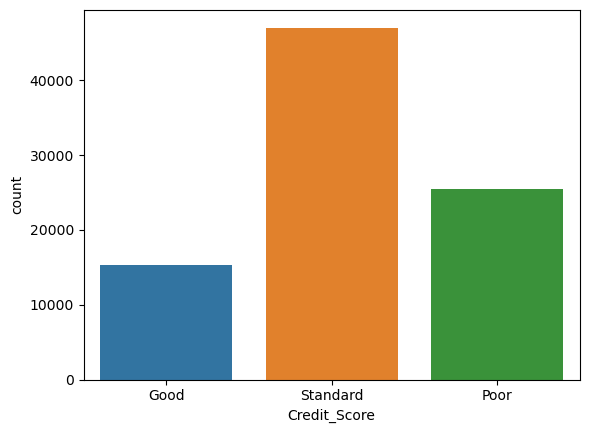

In [24]:
import seaborn as sns
sns.countplot(df_clear, x= 'Credit_Score')

<Axes: >

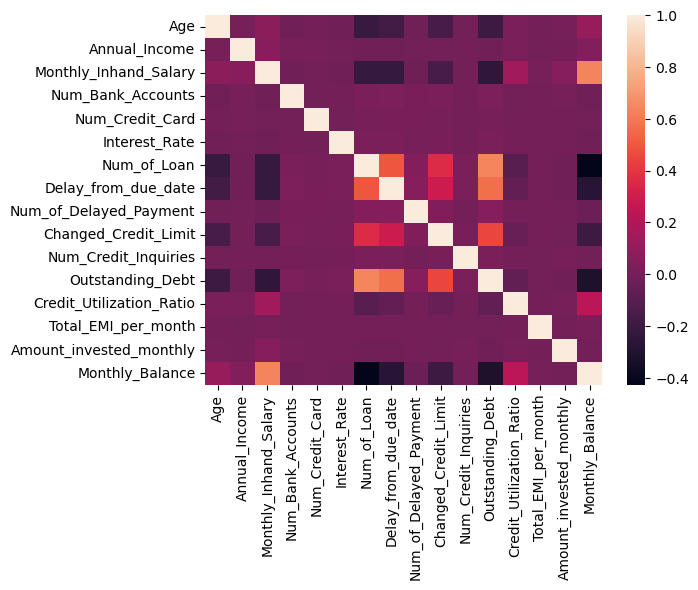

In [25]:
sns.heatmap(df_clear.corr(numeric_only=True))

In [26]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [27]:
print(df_clear['Credit_Score'].unique())

['Good' 'Standard' 'Poor']


In [28]:
Month = {'January': 'winter',
         'February': 'winter',
         'March': 'spring',
         'April': 'spring',
         'May': 'spring',
         'June': 'summer',
         'July': 'summer',
         'August': 'summer'}

# Переводим Month в бинарные признаки
df_month = df_clear['Month'].map(Month)
df_dummies_month = pd.get_dummies(df_month)
df_bin = pd.concat((df_clear, df_dummies_month), axis=1)
df_bin = df_bin.drop(['Month'], axis=1)

# Переводим Occupation в бинарные признаки
df_occ = pd.get_dummies(df_clear['Occupation'])
df_bin = pd.concat((df_bin, df_occ), axis=1)
df_bin = df_bin.drop(['Occupation'], axis=1)

# Т.к. у нас есть признак Total_EMI_per_month - означающий общую сумму платежа в месяц,
# то признак Type_of_loan не несет дополнительной полезной информации, а только
# увеличивает сложность предобработки. Поэтому этот признак целесообразно убрать.
df_bin = df_bin.drop(['Type_of_Loan'], axis=1)

# Переводим признак Credit_Mix
df_mix = pd.get_dummies(df_bin['Credit_Mix'])
df_bin = pd.concat((df_bin, df_mix), axis=1)
df_bin = df_bin.drop(['Credit_Mix'], axis=1)

# Credit_History_Age
import re
def date_to_num(s):
    elem = re.findall('\d+', s)
    return int(elem[0]) * 12 + int(elem[1])

df_age = df_bin['Credit_History_Age'].map(date_to_num)
df_bin = df_bin.drop(['Credit_History_Age'], axis=1)
df_bin = pd.concat((df_bin, df_age), axis=1)

# Payment_of_Min_Amount
df_pay = pd.get_dummies(df_bin['Payment_of_Min_Amount'])
df_bin = pd.concat((df_bin, df_pay), axis=1)
df_bin = df_bin.drop(['Payment_of_Min_Amount'], axis=1)

# Payment_Behaviour
df_pay = pd.get_dummies(df_bin['Payment_Behaviour'])
df_bin = pd.concat((df_bin, df_pay), axis=1)
df_bin = df_bin.drop(['Payment_Behaviour'], axis=1)

# Credit_Score
Credit_Score = {
    'Good': 0,
    'Standard': 1,
    'Poor': 2
}

df_score = df_clear['Credit_Score'].map(Credit_Score)
df_bin = df_bin.drop(['Credit_Score'], axis=1)
df_bin = pd.concat((df_bin, df_score), axis=1)
df_bin.reset_index(drop=True, inplace=True)

df_bin

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,NM,No,Yes,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,7.000000,11.27,...,False,True,False,False,False,True,False,False,False,0
1,23,19114.12,3629.593863,3,4,3,4,-1,17.021529,11.27,...,False,True,False,False,False,False,True,False,False,0
2,23,19114.12,3629.593863,3,4,3,4,5,4.000000,6.27,...,False,True,False,False,False,False,False,False,True,0
3,23,19114.12,1824.843333,3,4,3,4,6,17.021529,11.27,...,False,True,False,False,True,False,False,False,False,0
4,23,19114.12,3629.593863,3,4,3,4,8,4.000000,9.27,...,False,True,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87882,25,39628.99,3359.415833,4,6,7,2,20,6.000000,9.50,...,False,True,False,False,True,False,False,False,False,2
87883,25,39628.99,3359.415833,4,6,7,2,23,7.000000,11.50,...,False,True,False,True,False,False,False,False,False,2
87884,25,39628.99,3359.415833,4,6,7,2,18,7.000000,11.50,...,False,True,False,False,True,False,False,False,False,2
87885,25,39628.99,3359.415833,4,6,7,2,20,17.021529,11.50,...,False,True,False,False,False,False,True,False,False,1


# Подготовка данных

In [29]:
categorical_columns = [c for c in df_bin.columns if df_bin[c].dtype.name == 'object']
numerical_columns   = [c for c in df_bin.columns if df_bin[c].dtype.name != 'object']
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

data_numerical = df_bin[numerical_columns]
data_nonbinary = df_bin[nonbinary_columns]

data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,NM,No,Yes,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Credit_Score
count,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,...,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04,8.788700e+04
mean,-1.765705e-16,8.408120e-18,3.738380e-16,1.762471e-17,1.220794e-17,-1.536099e-18,3.524943e-17,1.487590e-17,1.054249e-16,7.373274e-17,...,3.557282e-17,3.557282e-17,-1.616946e-19,-6.694157e-17,4.155552e-17,-3.557282e-17,1.681624e-17,1.907996e-17,-2.199047e-17,-1.591075e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.789913e+00,-1.395359e-01,-1.304245e+00,-1.719330e-01,-1.667930e-01,-1.527028e-01,-1.450019e+00,-1.762692e+00,-3.014487e-01,-2.510734e+00,...,-3.687263e-01,-7.374239e-01,-1.057790e+00,-3.945968e-01,-4.636417e-01,-3.595874e-01,-3.419114e-01,-4.014062e-01,-7.024434e-01,-1.660006e+00
25%,-8.620859e-01,-1.173198e-01,-7.923917e-01,-1.028455e-01,-1.331915e-01,-1.296455e-01,-6.311863e-01,-7.520489e-01,-1.330641e-01,-7.365494e-01,...,-3.687263e-01,-7.374239e-01,-1.057790e+00,-3.945968e-01,-4.636417e-01,-3.595874e-01,-3.419114e-01,-4.014062e-01,-7.024434e-01,-1.720009e-01
50%,-2.704186e-02,-8.537511e-02,-1.530784e-01,-6.830177e-02,-1.219910e-01,-1.131760e-01,-2.217698e-01,-2.130392e-01,-2.080768e-02,-1.228656e-01,...,-3.687263e-01,-7.374239e-01,9.453561e-01,-3.945968e-01,-4.636417e-01,-3.595874e-01,-3.419114e-01,-4.014062e-01,-7.024434e-01,-1.720009e-01
75%,8.080021e-01,-2.228003e-02,4.369479e-01,-5.102991e-02,-9.959007e-02,-9.011871e-02,5.970632e-01,4.607229e-01,3.532053e-02,6.423816e-01,...,-3.687263e-01,1.356057e+00,9.453561e-01,-3.945968e-01,-4.636417e-01,-3.595874e-01,-3.419114e-01,-4.014062e-01,1.423586e+00,1.316004e+00
max,6.096614e+00,2.338097e+01,3.872494e+00,1.875804e+01,1.300497e+01,1.404401e+01,2.234729e+00,3.088395e+00,3.210323e+01,3.874251e+00,...,2.712008e+00,1.356057e+00,9.453561e-01,2.534204e+00,2.156813e+00,2.780933e+00,2.924701e+00,2.491213e+00,1.423586e+00,1.316004e+00


In [30]:
data = pd.concat((data_numerical, data_nonbinary, df_bin[binary_columns]), axis = 1)
print(data.shape)

(87887, 48)


In [31]:
X = data.drop('Credit_Score', axis=1)
Y = df_bin['Credit_Score']

In [32]:
from sklearn.model_selection import train_test_split
N_train = int(len(X) * 0.8)
N_test = len(X) - N_train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    train_size = N_train, test_size = N_test,
                                                    stratify = Y, random_state = 15)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# K-ближайших

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_test_predict = knn.predict(X_test)

In [36]:
err_test = 1 - knn.score(X_test, Y_test)
err_train = 1 - knn.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 22.766644384076006%
Ошибка на тесте: 41.14802594151781%


In [37]:
from sklearn.metrics import rand_score

rand_s = rand_score(Y_test, y_test_predict)
print('Оценка RAND: ', rand_s)

Оценка RAND:  0.5800758799668727


Метод k-ближайших не очень подходит для данного датасета

# PCA

In [38]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [39]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [40]:
scaled_data_train = pd.DataFrame(X_train_std)
scaled_data_test = pd.DataFrame(X_test_std)

<Axes: >

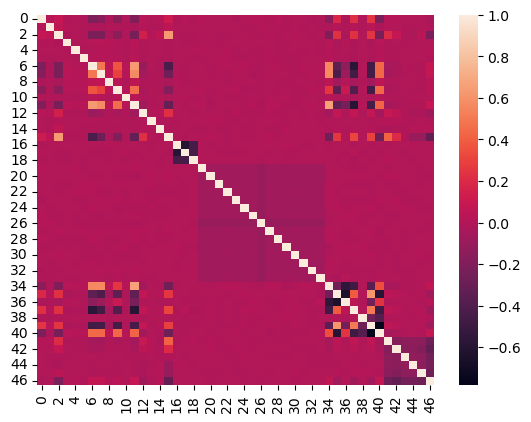

In [41]:
sns.heatmap(scaled_data_train.corr())

In [42]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

D:\Anaconda\Lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


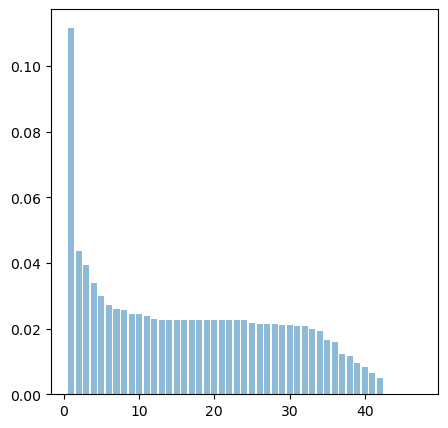

In [43]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
plt.figure(figsize=[5, 5])
plt.bar(range(1,48), var_exp, alpha=0.5,
        align='center')
plt.show()

Мы видим, что последние 6 векторов не дают вообще никакой информации, поэтому мы можем понизить размерность на 6.

# Понизим размерность до 6

In [44]:
scaled_data_train = pd.DataFrame(X_train_std)
scaled_data_test = pd.DataFrame(X_test_std)

In [45]:
pca_train = PCA(n_components = 6)
pca_test = PCA(n_components = 6)

pca_train.fit(scaled_data_train)
pca_test.fit(scaled_data_test)

data_pca_train = pca_train.transform(scaled_data_train)
data_pca_test = pca_train.transform(scaled_data_test)

data_pca_train = pd.DataFrame(data_pca_train)
data_pca_test = pd.DataFrame(data_pca_test)

<Axes: >

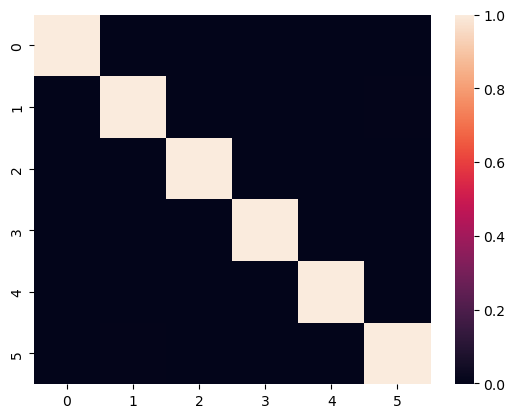

In [46]:
sns.heatmap(data_pca_train.corr())

In [47]:
model = KMeans(n_clusters=3, random_state=10)
model.fit(data_pca_train)

pred_labeles = model.predict(data_pca_test)
rand_s = rand_score(Y_test, pred_labeles)
print('RAND: ', rand_s)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


RAND:  0.5799725425736434


### Вывод: PCA и К-средних работают примерно с одинаковой точностью, но оба метода плохо подходят для данной задачи

# Теперь попробуем использовать Random forest

Для выборки полной размерности

In [48]:
from types import new_class
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=5)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=5)

In [49]:
pred_labeles = rfc.predict(X_test)
rand_s = rand_score(Y_test, pred_labeles)
print('Оценка RAND: ', rand_s)

Оценка RAND:  0.7176718846548068


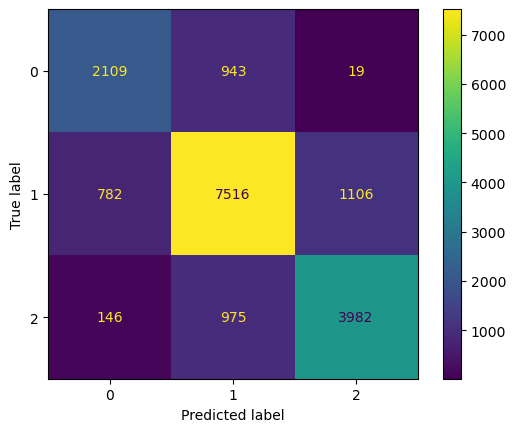

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, pred_labeles, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

Найдем оптимальное значение гиперпараметра n_estimators (количество деревьев)

In [51]:
n_estimators_arr = [i for i in range(1, 10)] + [i for i in range(10, 50, 10)]
test_err = []
train_err = []
for n in n_estimators_arr:
    rfc_model = RandomForestClassifier(n_estimators = n)
    rfc_model.fit(X_train, Y_train)

    y_train_pred = rfc_model.predict(X_train)
    y_test_pred = rfc_model.predict(X_test)
    train_err.append(np.mean(Y_train != y_train_pred))
    test_err.append(np.mean(Y_test != y_test_pred))
    print('n:', n)

n: 1
n: 2
n: 3
n: 4
n: 5
n: 6
n: 7
n: 8
n: 9
n: 10
n: 20
n: 30
n: 40


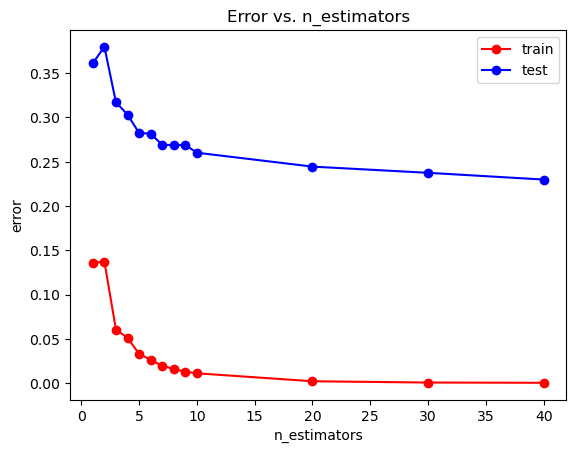

In [52]:
plt.plot(n_estimators_arr, train_err, 'r-o', label = 'train')
plt.plot(n_estimators_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

In [53]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0003271273947858738 0.22983274547730118


Теперь рассмотрим зависимость от параметра max_depth (максимальная глубина дерева)

In [54]:
max_depth_arr = [i for i in range(1, 10)] + [i for i in range(10, 100, 10)]
test_err = []
train_err = []
for depth in max_depth_arr:
    rfc_model = RandomForestClassifier(max_depth = depth)
    rfc_model.fit(X_train, Y_train)

    y_train_pred = rfc_model.predict(X_train)
    y_test_pred = rfc_model.predict(X_test)
    train_err.append(np.mean(Y_train != y_train_pred))
    test_err.append(np.mean(Y_test != y_test_pred))
    print('depth:', depth)

depth: 1
depth: 2
depth: 3
depth: 4
depth: 5
depth: 6
depth: 7
depth: 8
depth: 9
depth: 10
depth: 20
depth: 30
depth: 40
depth: 50
depth: 60
depth: 70
depth: 80
depth: 90


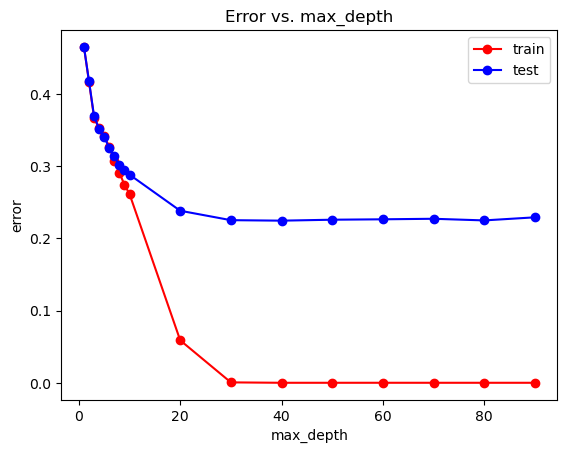

In [55]:
plt.plot(max_depth_arr, train_err, 'r-o', label = 'train')
plt.plot(max_depth_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend()

In [56]:
rfc = RandomForestClassifier(random_state=40)
rfc.fit(data_pca_train, Y_train)

RandomForestClassifier(random_state=40)

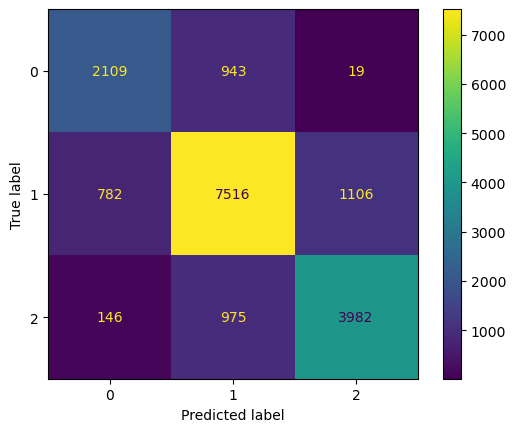

In [57]:
cm = confusion_matrix(Y_test, pred_labeles, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

In [58]:
pred_labeles = rfc.predict(data_pca_test)
rand_s = rand_score(Y_test, pred_labeles)
print('Оценка RAND: ', rand_s)

Оценка RAND:  0.6023657893468275


## Вывод: из всех рассмотренных методов RandomForestClassifier работает лучше всех, так как имеет метрику Rand больше, чем у других. Однако метрика Rand все равно достаточно далека от 1, и для решения данной задачи ни один из этих методов не подходит, соответственно, следует выбирать другие, например, нейронные сети, которые мы рассмотрим в будущем.